In [1]:
import os
from glob import glob
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

from skimage.transform import resize
import librosa

from skimage.exposure import equalize_hist

This dataset analysis is based from Kaggel notebook by [fffrrt](https://www.kaggle.com/fffrrt/all-in-one-rfcx-baseline-for-beginners/comments).

In [2]:
train_csv = "E:/Kaggle/rfcx_species_audio/train_tp.csv"
train_data = np.asarray(pd.read_csv(train_csv), dtype = np.object)
# File name, species_id, song_type, t_min, f_min, t_max, f_max

In [3]:
# Calculating lower and upper bound frequencies for the whole dataset
f_min = np.min(train_data[:, 4])
f_max = np.max(train_data[:, 6])
print("Lower Bound = {0:0.2f}Fz \nUpper Bound = {1:0.2f}Fz".format(f_min, f_max))

Lower Bound = 93.75Fz 
Upper Bound = 13687.50Fz


In [4]:
# Padding frequency bounds
f_min = int(f_min * 0.9)
f_max = int(f_max * 1.1)
print("Padded Lower Bound = {0:d}Fz \nPadded Upper Bound = {1:d}Fz".format(f_min, f_max))

Padded Lower Bound = 84Fz 
Padded Upper Bound = 15056Fz


In [5]:
# Calculating sample window in seconds
t_min = np.min(train_data[:, 5] - train_data[:, 3])
t_max = np.max(train_data[:, 5] - train_data[:, 3])
print("Min Sample Window = {0:0.2f}s \nMax Sample Window = {1:0.2f}s".format(t_min, t_max))

Min Sample Window = 0.27s 
Max Sample Window = 7.92s


In [6]:
# Based on the Max sample window, we can choose 10sec as the default window for all the sampels
win_sec = 10 #sec

In [7]:
fft = 2048 # Sampling window
hop = 512 # Stride
sr = 48000 # Sampling rate
length = win_sec * sr # data sample length in terms of frequency

Visualizing a tranining sample 

In [8]:
name = str(train_data[0, 0])
t_min = int(sr * train_data[0, 3])
t_max = int(sr * train_data[0, 5])

In [9]:
wav, sr = librosa.load("E:/Kaggle/rfcx_species_audio/train/" + name + ".flac", sr=None)

In [10]:
# Creating a standardized window around the center of the sample in time.
center = (t_min + t_max) // 2
start = int(np.clip(center - length // 2, 0, np.inf))
end = int(np.clip(start + length , -np.inf, len(wav)))

In [11]:
slice_time = wav[start:end]
slice_melspec = librosa.feature.melspectrogram(slice_time, n_fft=fft, hop_length=hop, sr=sr, fmin=f_min, fmax=f_max, power=1.5)

In [12]:
slice_melspec = resize(slice_melspec, (224, 320), order=3)

In [13]:
slice_melspec = slice_melspec - np.min(slice_melspec)
slice_melspec = slice_melspec / np.max(slice_melspec)

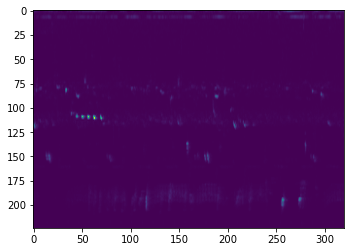

In [14]:
plt.imshow(slice_melspec)

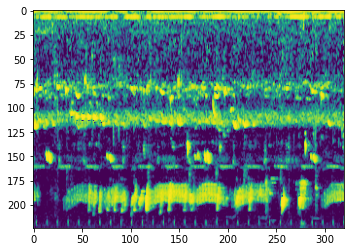

In [15]:
plt.imshow(equalize_hist(slice_melspec, 512))